In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### import data

In [2]:
df = pd.read_csv('../data/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
x = df.iloc[:, [3, 4]].to_numpy() # took only 2 features just for the sake of visualization

##### dendrogram

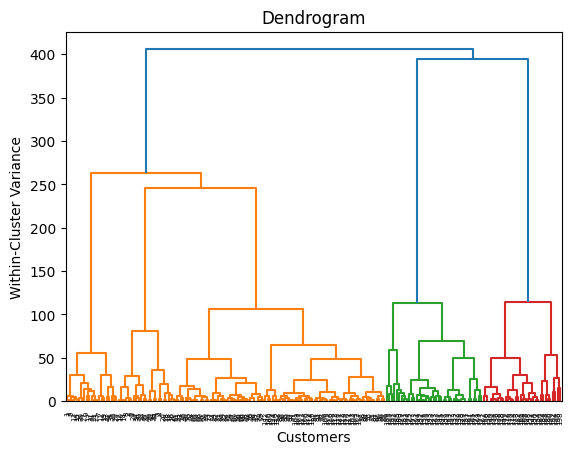

In [4]:
import scipy.cluster.hierarchy as sch

# ‘ward’ minimizes the variance of the clusters being merged
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Within-Cluster Variance')
plt.show()

In [5]:
n_clusters = 5 # optimal clusters

##### train the model

In [6]:
from sklearn.cluster import AgglomerativeClustering

# euclidean distance is used to compute the within-cluster variance
hc = AgglomerativeClustering(n_clusters = n_clusters, linkage = 'ward', metric = 'euclidean') # ward works only with euclidean metric

y = hc.fit_predict(x)

In [7]:
print(y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


##### visualize the clusters

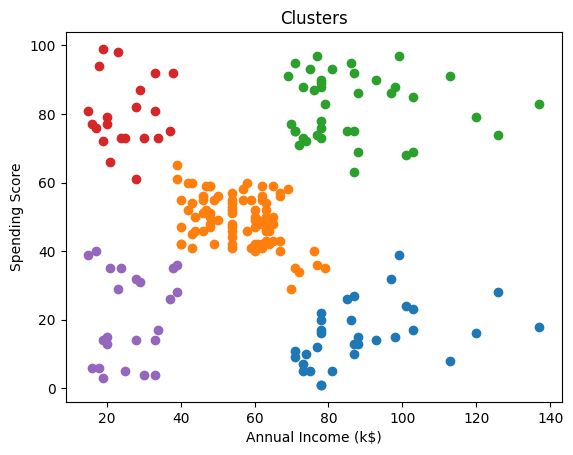

In [8]:
for c in range(0, n_clusters):
    plt.scatter(x[y == c, 0], x[y == c, 1])

plt.title('Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()